## Bioinformática: Exploração de dados e análise da qualidade do sequenciamento em formato fastq

In [1]:
from collections import defaultdict
import gzip

import seaborn as sns
import matplotlib.pyplot as plt

from Bio import SeqIO

In [2]:
recs = SeqIO.parse("C:/Users/julia/303_S1_L001_R2_001.fastq", 'fastq')
rec = next(recs)
print(rec) # uma leitura

ID: M00835:6:000000000-A4AJE:1:1101:15890:1331
Name: M00835:6:000000000-A4AJE:1:1101:15890:1331
Description: M00835:6:000000000-A4AJE:1:1101:15890:1331 2:N:0:1
Number of features: 0
Per letter annotation for: phred_quality
Seq('TTCCTAGACCTTATCCTAATCTGGACATAGTTTTACCAATTAATCGTCTAACCC...GTG')


In [3]:
# usando a codificação Illumina 1.3+ FASTQ (valores PHRED com um deslocamento ASCII de 64):
print(rec.format("fastq-illumina"))

@M00835:6:000000000-A4AJE:1:1101:15890:1331 2:N:0:1
TTCCTAGACCTTATCCTAATCTGGACATAGTTTTACCAATTAATCGTCTAACCCAAATTATGGCGGCTGGCAGTTATAGTCGTCTAAGTAATCAAGCTATAAGGTTAGTAGAAAACCGTGGAGTCCCCGCCATGGTAGGAGCTTGTGTTGCTATTGCCAAATCCGCACAAGTTCTCTTGGCTTNNNNCGCAGAAATTGGTGCTGGACGCTGTACTGCCNNTATTTGTAGCACAGTCGCACTGGTGGCTGTG
+
`````ePa_beeffaR`aaffegffeeggggfgfegcfgggggafegggffeegdfOegeeef`bfNNNaNOdfPQQ__aQ^^edNeQQ_QQQePPPPaQQQQP_PPOaaQQePOO^_^N[NNaOePN[]]NNPeeQeNPO^O[OO_^^NPP_^PPP^[efePPMM]LLOOOOOOOOOO[NNMBBBBMZMMMLYYOOOYZMOOZ\XMLLMXMZOOOONBBMMZZMOOOZOXNLZXNLLLLLNLZLLLXLLN



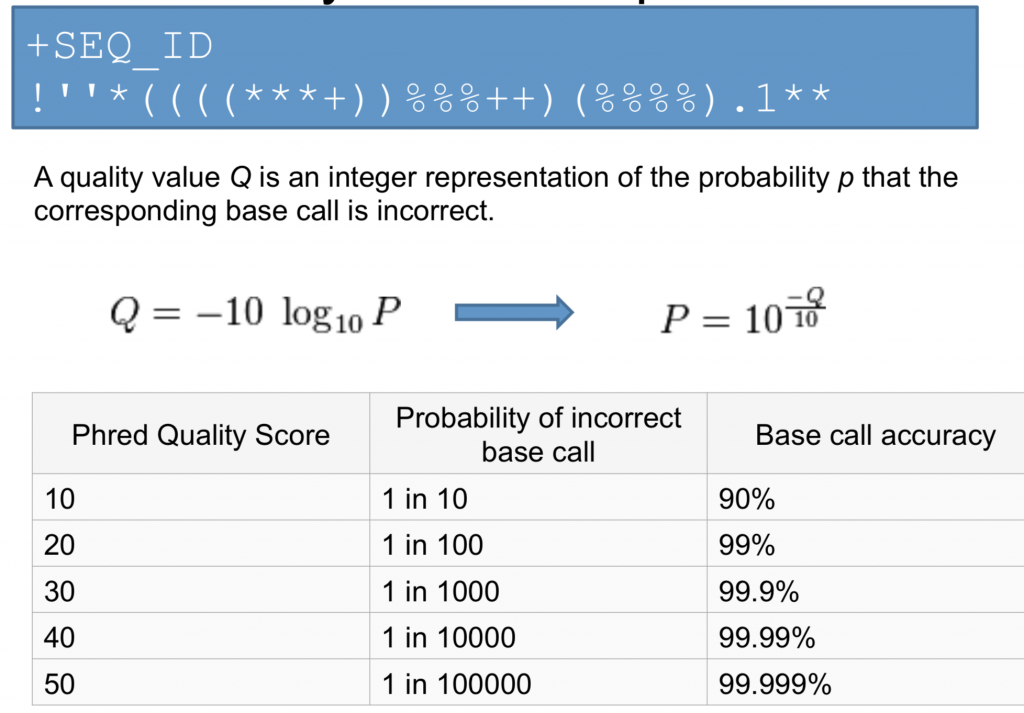

In [4]:
from IPython.display import Image
Image(filename = 'Screen-Shot-2018-01-07-at-1.36.09-PM-1024x713 (1).png',width=450)

In [5]:
print(rec.id, rec.description, rec.seq)
print(100*'-')
print(rec.letter_annotations) #índices de qualidade das leituras por letra de 1 sequencia

M00835:6:000000000-A4AJE:1:1101:15890:1331 M00835:6:000000000-A4AJE:1:1101:15890:1331 2:N:0:1 TTCCTAGACCTTATCCTAATCTGGACATAGTTTTACCAATTAATCGTCTAACCCAAATTATGGCGGCTGGCAGTTATAGTCGTCTAAGTAATCAAGCTATAAGGTTAGTAGAAAACCGTGGAGTCCCCGCCATGGTAGGAGCTTGTGTTGCTATTGCCAAATCCGCACAAGTTCTCTTGGCTTNNNNCGCAGAAATTGGTGCTGGACGCTGTACTGCCNNTATTTGTAGCACAGTCGCACTGGTGGCTGTG
----------------------------------------------------------------------------------------------------
{'phred_quality': [32, 32, 32, 32, 32, 37, 16, 33, 31, 34, 37, 37, 38, 38, 33, 18, 32, 33, 33, 38, 38, 37, 39, 38, 38, 37, 37, 39, 39, 39, 39, 38, 39, 38, 37, 39, 35, 38, 39, 39, 39, 39, 39, 33, 38, 37, 39, 39, 39, 38, 38, 37, 37, 39, 36, 38, 15, 37, 39, 37, 37, 37, 38, 32, 34, 38, 14, 14, 14, 33, 14, 15, 36, 38, 16, 17, 17, 31, 31, 33, 17, 30, 30, 37, 36, 14, 37, 17, 17, 31, 17, 17, 17, 37, 16, 16, 16, 16, 33, 17, 17, 17, 17, 16, 31, 16, 16, 15, 33, 33, 17, 17, 37, 16, 15, 15, 30, 31, 30, 14, 27, 14, 14, 33, 15, 37, 16, 14, 27, 29, 29, 14, 14, 16

### Distribuição de nucleotídeos por leitura

In [12]:
cont = defaultdict(int)
for rec in recs:
    for letra in rec.seq:
        cont[letra] += 1

total = sum(cont.values())

for letra, cont in cont.items():
    print('%s: %2.f %d' % (letra, 100. * cont / total, cont))

G: 29 558840685
T: 21 393058863
C: 30 571730093
A: 20 386240599
N:  0 121505


<b>Temos que:</b><br>
A : adenina<br>
T : timina<br>
C : citosina<br>
G : guanina<br>
N : base nucleotídica não nomeada, é uma incógnita relatada pelo sequenciador<br>
O nucleotídeo representado pela letra R indica a ocorrência de uma população mista, podendo neste caso ser um G ou A

### Análise gráfica

In [13]:
import os
import math
import pylab as plt
import numpy as np
import pandas as pd
import matplotlib.patches as patches

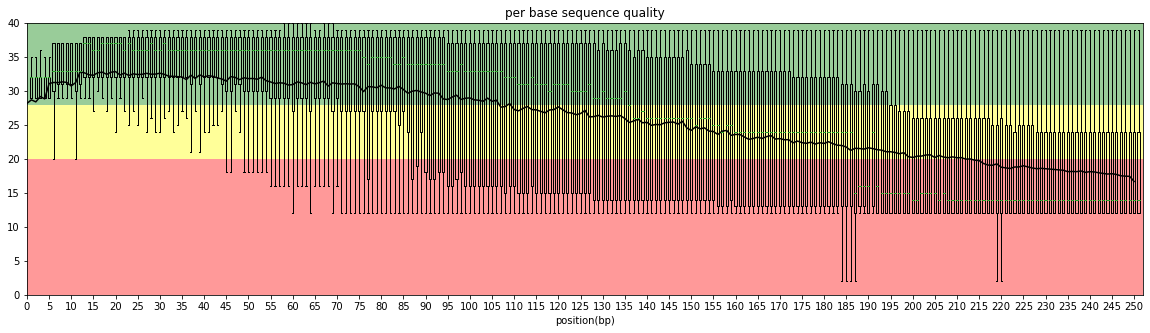

In [14]:

def plot_fastq_qualities(filename, ax=None, limit=10000):

    fastq_parser = SeqIO.parse(filename,"fastq")
    res=[]
    c=0
    for record in fastq_parser:
        score=record.letter_annotations["phred_quality"]
        res.append(score)
        c+=1
        if c>limit:
            break
    df = pd.DataFrame(res)
    l = len(df.T)+1

    if ax==None:
        f,ax=plt.subplots(figsize=(20,5))
    rect = patches.Rectangle((0,0),l,20,linewidth=0,facecolor='r',alpha=.4)
    ax.add_patch(rect)
    rect = patches.Rectangle((0,20),l,8,linewidth=0,facecolor='yellow',alpha=.4)
    ax.add_patch(rect)
    rect = patches.Rectangle((0,28),l,12,linewidth=0,facecolor='g',alpha=.4)
    ax.add_patch(rect)
    df.mean().plot(ax=ax,c='black')
    boxprops = dict(linestyle='-', linewidth=1, color='black')
    df.plot(kind='box', ax=ax, grid=False, showfliers=False,
            color=dict(boxes='black',whiskers='black')  )
    ax.set_xticks(np.arange(0, l, 5))
    ax.set_xticklabels(np.arange(0, l, 5))
    ax.set_xlabel('position(bp)')
    ax.set_xlim((0,l))
    ax.set_ylim((0,40))
    ax.set_title('per base sequence quality')    
    return

filename = "C:/Users/julia/303_S1_L001_R2_001.fastq"
plot_fastq_qualities(filename, ax=None, limit=10000)

### Conteúdo GC

In [15]:
def fastq_to_dataframe(filename, size=1000):
    """Convert fastq to dataframe.
        size: limit to the first reads of total size
        Returns: dataframe with reads
    """

    ext = os.path.splitext(filename)[1]
    if ext=='.fastq' or ext=='.gz':
        fastq_parser = SeqIO.parse(filename, "fastq")
    else:
        fastq_parser = SeqIO.parse(open(filename, "r"), "fastq")
    i=0
    res=[]
    for fastq_rec in fastq_parser:
        #print (fastq_rec.seq)
        i+=1
        if i>size:
            break
        res.append([fastq_rec.id, str(fastq_rec.seq)])
    df = pd.DataFrame(res, columns=['id','seq'])
    df['length'] = df.seq.str.len()
    return df

def normpdf(x, mean, sd):
    """sample a normal distribution at given point"""

    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

def plot_fastq_gc_content(filename, ax=None, limit=50000):

    from Bio.SeqUtils import GC
    if ax==None:
        f,ax=plt.subplots(figsize=(12,5))
    df = fastq_to_dataframe(filename, size=limit)
    gc = df.seq.apply(lambda x: GC(x))  
    gc.hist(ax=ax,bins=150,color='black',grid=False,histtype='step',lw=2)
    ax.set_xlim((0,100))    
    x=np.arange(1,100,.1)
    f = [normpdf(i, gc.mean(), gc.std()) for i in x]    
    ax2=ax.twinx()   
    ax2.plot(x,f)
    ax2.set_ylim(0,max(f))
    ax.set_title('GC content',size=15)
    return

In [16]:
fastq_to_dataframe(filename, size=50)

,id,seq,length
0,M00835:6:000000000-A4AJE:1:1101:15890:1331,TTCCTAGACCTTATCCTAATCTGGACATAGTTTTACCAATTAATCG...,251
1,M00835:6:000000000-A4AJE:1:1101:16167:1337,GTCGACCACACCGGTGCTCGCCAATACCGGGGTGCGCCACAACACC...,251
2,M00835:6:000000000-A4AJE:1:1101:15483:1338,ATTTAACTTCAACGCTAAAACTTGGATATTGTATGGGCAATAGTAA...,251
3,M00835:6:000000000-A4AJE:1:1101:16144:1339,GTCTCTTACTTGACGTGCTTGTTCTATGTCAGAAATACCAAATCCC...,251
4,M00835:6:000000000-A4AJE:1:1101:15847:1343,GCCCCTAATCGCTACGTTCGCCACACCAACGCATCGGCTACGGCGC...,251
5,M00835:6:000000000-A4AJE:1:1101:15387:1344,TTCTGGTCGTGCGCTGGCTGCCCGGGATTCCGATTCCCGGTTCGAT...,251
6,M00835:6:000000000-A4AJE:1:1101:15626:1346,CTTAAAACCGTGTCTGTTAGTGGTATTCCAGCTAATAATGGCCCCG...,250
7,M00835:6:000000000-A4AJE:1:1101:16224:1347,GGATACAGATCCGCAGAGTCTGGCGGACTCGGTTCACCCCAGTCGT...,250
8,M00835:6:000000000-A4AJE:1:1101:16372:1348,GGCGATGGCCGGCACGTCGTTCTTCGGATTGGCGCCGAGCGAGCCG...,251
9,M00835:6:000000000-A4AJE:1:1101:16405:1351,GGGCTTCGTGCAGGCCGCGCTCGGCCACACAGGACTCGGGCACCAG...,250


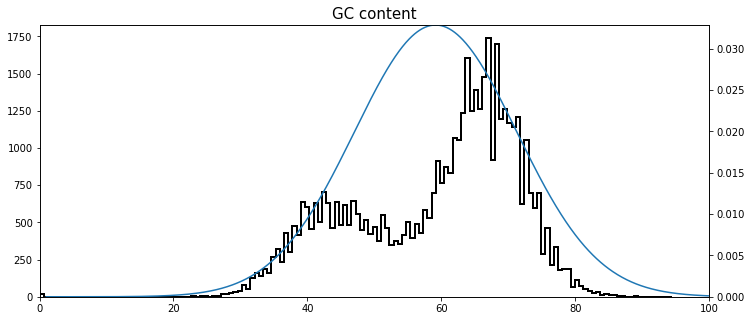

In [17]:
plot_fastq_gc_content(filename, ax=None, limit=50000)

### Corte de qualidade mínima 20, segundo gráfico "per base sequence quality"

In [35]:
cont_qual = defaultdict(int)
for rec in recs:
    for i , qual in enumerate(rec.letter_annotations['phred_quality']):
        if qual > 20:
            cont_qual[qual] += 1

total = sum(cont_qual.values())

for qual, cont in cont_qual.items():
    print('%s: %2.f %d' % (qual, 100. * cont / total, cont))

29:  1 16083432
32:  5 73126240
30:  2 30443829
31:  2 31037472
36:  5 74796122
38: 23 347384935
37: 19 292270418
39: 17 256165478
34:  5 69196858
33:  7 100278124
27:  1 14663865
24:  4 65414832
26:  4 52761102
28:  1 8283165
35:  3 48154417
21:  0 55740
25:  1 18728703
40:  0 109322


No resultado acima temos:<br>
score de qualidade | porcentagem desse score no conjunto de dados (redondos) | quantidade desse score no conjunto de dados

In [21]:
good_reads = (
    rec
    for rec in SeqIO.parse(filename, 'fastq')
    if min(rec.letter_annotations['phred_quality']) >=20
)

cont = SeqIO.write(good_reads, "good_quality.fastq","fastq")
print(f'{cont} leituras salvas')

291989 leituras salvas


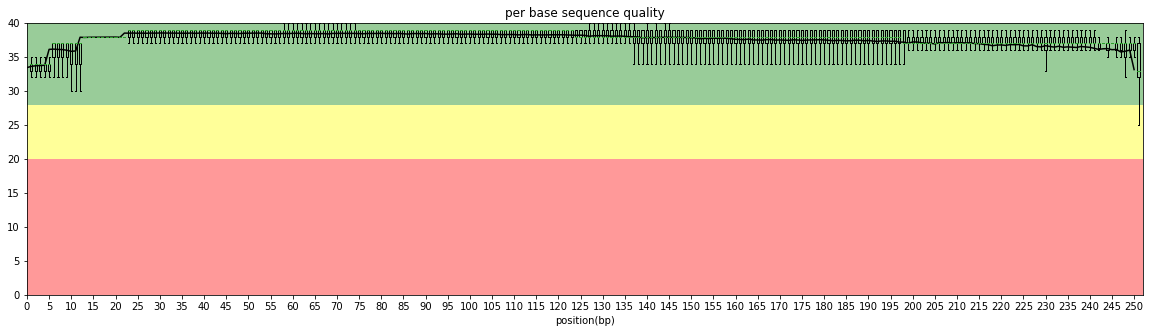

In [22]:
# vizualização gráfica do fastq resultante
plot_fastq_qualities("good_quality.fastq", ax=None, limit=10000)